In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [105]:
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

In [106]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def __update_centroids(self, X, labels):
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return centroids

    def __update_membership(self, X, centroids):
        labels = np.array([np.argmin(distance(x, centroids)) for x in X])
        return labels

    def fit(self, X):
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]

        for i in range(self.max_iter):
            labels = self.__update_membership(X, self.centroids)
            new_centroids = self.__update_centroids(X, labels)

            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def predict(self, X):
        return np.array([np.argmin(distance(x, self.centroids)) for x in X])

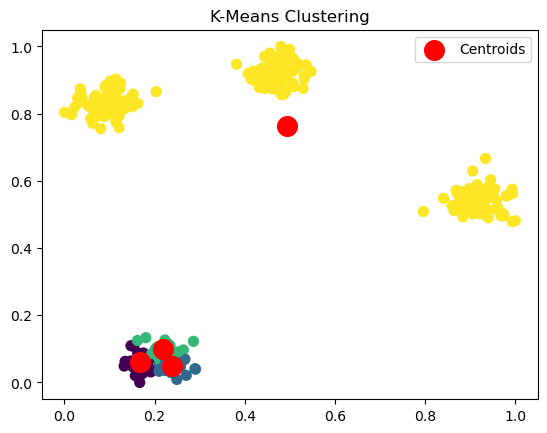

Centroids: 
[[-7.56349329 -6.97420061]
 [-6.41419546 -7.18225693]
 [-6.75489757 -6.25870437]
 [-2.25095191  6.08381814]]


In [107]:
scaler = MinMaxScaler()
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
X = scaler.fit_transform(X)

model = KMeans(n_clusters=4 )
model.fit(X)
labels = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=200, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

print("Centroids: ")
print(scaler.inverse_transform(model.centroids))

In [108]:
## ^^^ ข้อเสีย Kmean sensitive to initial centroid
## จึงใช้ Kmean++ คือแก้ fit algorithm

#Hand on!!!

In [109]:
scaler = MinMaxScaler()
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
X = scaler.fit_transform(X)

## Initialize Membership Matrix

In [110]:
n_clusters = 3
n_samples = X.shape[0]

In [111]:
membership = np.random.rand(n_samples, n_clusters) ## N x C
membership = membership/membership.sum(axis=1, keepdims=True)
membership

array([[4.15443821e-01, 2.48855106e-01, 3.35701073e-01],
       [8.27680808e-01, 1.24314650e-01, 4.80045419e-02],
       [5.23613161e-01, 4.26615131e-01, 4.97717078e-02],
       [3.08635363e-01, 5.00858227e-01, 1.90506411e-01],
       [8.70676509e-01, 6.29282651e-02, 6.63952260e-02],
       [3.96163492e-01, 1.95794717e-01, 4.08041791e-01],
       [2.04697188e-01, 5.88604155e-03, 7.89416770e-01],
       [4.22163969e-01, 2.01903151e-01, 3.75932881e-01],
       [9.20182732e-04, 6.94764682e-01, 3.04315135e-01],
       [5.52792750e-01, 4.30594612e-01, 1.66126383e-02],
       [2.57211256e-01, 1.59439399e-01, 5.83349345e-01],
       [1.34745259e-01, 4.36110102e-01, 4.29144639e-01],
       [1.71150219e-01, 1.55691410e-01, 6.73158370e-01],
       [3.17650317e-01, 1.40344944e-01, 5.42004739e-01],
       [7.02580599e-02, 6.55067551e-01, 2.74674389e-01],
       [1.52006445e-01, 4.37891301e-01, 4.10102254e-01],
       [3.98627828e-01, 3.02302791e-01, 2.99069381e-01],
       [3.25870128e-01, 3.32772

## Calculate Centroids Based on Memberships

In [112]:
m = 2
um = membership**m
centroid = (um.T @ X)/(um.T).sum(axis=1, keepdims=True) # C x N
centroid



array([[0.42529235, 0.59969258],
       [0.431046  , 0.55814535],
       [0.40931905, 0.58066912]])

## Update Membership Matrix Based on Distances

In [113]:
distances = np.array([distance(x, centroid) for x in X])
inv_distance = distances**(-2/(m-1))
new_membership = inv_distance/np.sum(inv_distance, axis=1, keepdims=True)

# for i in range(n_samples):
#     demominator = 0
#     for j in range(n_clusters):
#         for k in range(n_clusters):
#             demominator += (distances[i,j]/distances[i,k])**(2/(m-1))
#     membership[i,:] = 1/demominator



new_membership



array([[0.3451767 , 0.30343887, 0.35138443],
       [0.3449873 , 0.30460571, 0.35040699],
       [0.37866038, 0.2955588 , 0.32578082],
       [0.30906699, 0.35299665, 0.33793636],
       [0.34189547, 0.30781178, 0.35029274],
       [0.30952556, 0.35424354, 0.3362309 ],
       [0.33601648, 0.34680396, 0.31717956],
       [0.31033831, 0.35319315, 0.33646854],
       [0.37529635, 0.29452475, 0.3301789 ],
       [0.33669239, 0.34783562, 0.31547199],
       [0.36819281, 0.3001718 , 0.33163539],
       [0.33410767, 0.34847195, 0.31742038],
       [0.38357904, 0.29034346, 0.3260775 ],
       [0.37589552, 0.29161734, 0.33248714],
       [0.34529572, 0.3040078 , 0.35069648],
       [0.37589208, 0.29347893, 0.33062899],
       [0.34404617, 0.30660429, 0.34934954],
       [0.33557671, 0.35021228, 0.31421101],
       [0.37084298, 0.29932444, 0.32983258],
       [0.3669988 , 0.30314777, 0.32985343],
       [0.33406191, 0.34767253, 0.31826556],
       [0.37291254, 0.29716682, 0.32992064],
       [0.

## `FuzzyCMeans` Class Implementation

In [114]:
class FuzzyCMeans:
    def __init__(self, n_clusters, max_iter=100, m=2, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.tol = tol

    def __update_centroids(self, X, membership):
        um = membership**self.m
        centroids = (um.T @ X)/(um.T).sum(axis=1, keepdims=True) # C x N
        return centroids

    def __update_membership(self, X, centroids):
        distances = np.array([distance(x, centroids) for x in X])
        inv_distance = distances**(-2/(m-1))
        new_membership = inv_distance/np.sum(inv_distance, axis=1, keepdims=True)
        return new_membership
    
    def fit(self, X):
        ## initial membership
        n_samples = X.shape[0]
        membership = np.random.rand(n_samples, self.n_clusters) ## N x C
        membership = membership/membership.sum(axis=1, keepdims=True)
        self.centroids = self.__update_centroids(X, membership)
        
        ## update membership
        for i in range(self.max_iter):
            membership = self.__update_membership(X,self.centroids)
            new_centroids = self.__update_centroids(X, membership)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            
            self.centroids = new_centroids
        
    def predict(self, X):
        return np.array([np.argmin(distance(x, self.centroids)) for x in X])


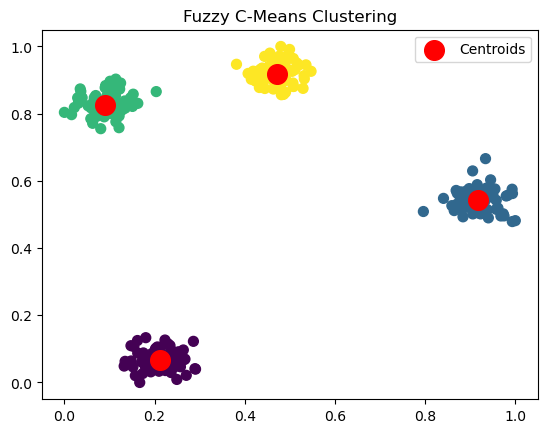

Centroids: 
[[-6.85063655 -6.85081287]
 [ 4.68728819  2.01331716]
 [-8.84161591  7.23444763]
 [-2.60631499  8.99056665]]


In [115]:
scaler = MinMaxScaler()
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
X = scaler.fit_transform(X)

model = FuzzyCMeans(n_clusters=4)
model.fit(X)
labels = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=200, c='red', label='Centroids')
plt.title("Fuzzy C-Means Clustering")
plt.legend()
plt.show()

print("Centroids: ")
print(scaler.inverse_transform(model.centroids))

#Workshop -- Apply your Fuzzy C-means for customer segmentation

##Load data

In [116]:
#https://drive.google.com/file/d/1tuYoSQxg-isoWzhKonrpVNEcrbJbZRSJ/view?usp=sharing
!gdown --id 1tuYoSQxg-isoWzhKonrpVNEcrbJbZRSJ

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [117]:
# Read dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [119]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

df_encoded = df_encoded.drop('CustomerID', axis=1)
df_encoded.head()






,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0


In [120]:
X = df_encoded.iloc[:,[1,2]].values
X = MinMaxScaler().fit_transform(X)

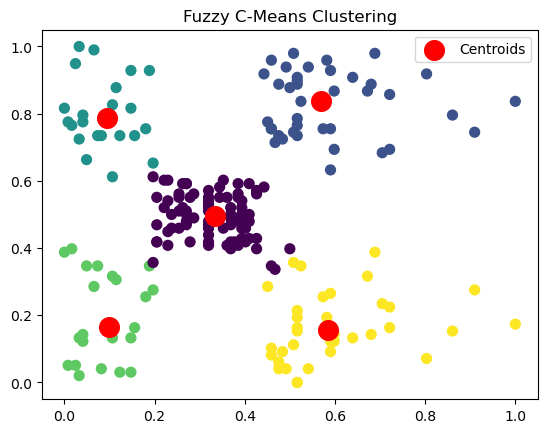

Centroids: 
[[-4.84908844  1.09958668]
 [-1.0097452   7.48314662]
 [-8.76849197  6.52268973]
 [-8.68998964 -5.01884735]
 [-0.78063441 -5.20654593]]


In [121]:
model = FuzzyCMeans(n_clusters=5)
model.fit(X)
labels = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=200, c='red', label='Centroids')
plt.title("Fuzzy C-Means Clustering")
plt.legend()
plt.show()

print("Centroids: ")
print(scaler.inverse_transform(model.centroids))

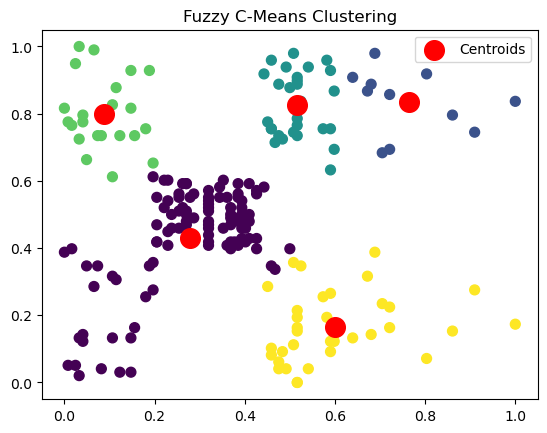

Centroids: 
[[-5.78022372 -0.09749479]
 [ 2.16656792  7.40441825]
 [-1.87350135  7.24608465]
 [-8.88368507  6.7661552 ]
 [-0.5113214  -5.04590065]]


In [122]:
model = KMeans(n_clusters=5)
model.fit(X)
labels = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=200, c='red', label='Centroids')
plt.title("Fuzzy C-Means Clustering")
plt.legend()
plt.show()

print("Centroids: ")
print(scaler.inverse_transform(model.centroids))